<h2>XGB_OP01 Submission 01 ()</h2>

In [ ]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
# Handle missing values
train_df.fillna(train_df.mode().iloc[0], inplace=True)
test_df.fillna(test_df.mode().iloc[0], inplace=True)

In [ ]:
# Encode categorical features
encoder = LabelEncoder()
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [ ]:
# Selecting features and target
X = train_df.drop(columns=['id', 'Price'])
y = train_df['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Optuna optimization function
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return np.sqrt(mse)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

In [ ]:
# Train best model
best_params = study.best_params
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

In [ ]:
# Evaluate model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

In [ ]:
# Predict on test data
test_X = test_df.drop(columns=['id'])
test_preds = model.predict(test_X)

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None

Train Data Description:
                  id   Compartments  Weight Capacity (kg)          Price
count  300000.000000  300000.0

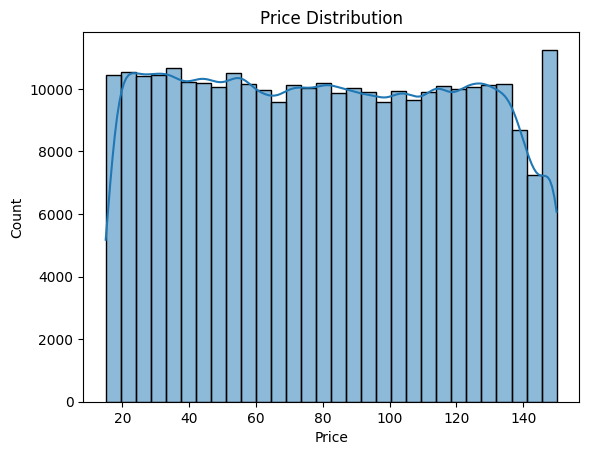

[I 2025-02-11 14:14:55,811] A new study created in memory with name: no-name-15e78b7a-50e8-477f-bbc7-d6bf0959be7f
[I 2025-02-11 14:15:01,032] Trial 0 finished with value: 38.92228051700631 and parameters: {'n_estimators': 459, 'learning_rate': 0.01008420906693564, 'max_depth': 7, 'subsample': 0.9652322856390967, 'colsample_bytree': 0.5550341266159431}. Best is trial 0 with value: 38.92228051700631.
[I 2025-02-11 14:15:03,045] Trial 1 finished with value: 39.133357283555036 and parameters: {'n_estimators': 174, 'learning_rate': 0.14450404872203493, 'max_depth': 7, 'subsample': 0.6442735049962447, 'colsample_bytree': 0.6761697334563466}. Best is trial 0 with value: 38.92228051700631.
[I 2025-02-11 14:15:08,407] Trial 2 finished with value: 39.222402260715924 and parameters: {'n_estimators': 532, 'learning_rate': 0.1801800931500346, 'max_depth': 6, 'subsample': 0.741260323697708, 'colsample_bytree': 0.6483826658190646}. Best is trial 0 with value: 38.92228051700631.
[I 2025-02-11 14:15:17

Root Mean Squared Error: 38.91276419223391
Submission file created successfully.


In [ ]:
# Prepare submission file
submission = pd.DataFrame({'id': test_df['id'], 'Price': test_preds})
submission.to_csv("XGB_OP01.csv", index=False)

print("Submission file created successfully.")